In [1]:
'''
!pip install Cython
!git clone https://github.com/waleedka/coco.git

!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI
'''

'\n!pip install Cython\n!git clone https://github.com/waleedka/coco.git\n\n!pip install -U setuptools\n!pip install -U wheel\n!make install -C coco/PythonAPI\n'

In [25]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
import imageio
import tensorflow as tf


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
# Ignore Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
print(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/interior/"))  # To find local version
import interior

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
print('finished')

/home/erbachj/MaskRCNN/Mask_RCNN
finished


In [3]:
class TrainConfig(interior.InteriorNetConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 30

config = TrainConfig()
config.display()
batch_size = config.BATCH_SIZE


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                53
IMAGE_MIN_DIM                  640
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [4]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)
#model.load_weights(model_path, by_name=True)

# Load pretrained weights
model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [5]:
#TRAIN_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7/3FO4IDDWIQX7_Dining_room'
#TRAIN_DIR = os.path.join(TRAIN_DIR,'cam0/data/')
TRAIN_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7'
# Training dataset
dataset_train = interior.InteriorDataset()
dataset_train.load_Interior(dataset_dir=TRAIN_DIR, subset='train')
dataset_train.prepare()

# Validation dataset
#VAL_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7/3FO4IDEI1LAV_Dining_room'
#VAL_DIR = os.path.join(VAL_DIR,'cam0/data/')
VAL_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7'

dataset_val = interior.InteriorDataset()
dataset_val.load_Interior(dataset_dir=VAL_DIR, subset='val')
dataset_val.prepare()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotation

/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7/train/3FO4MM1V06TL_Living_room/./cam0/data/4.png


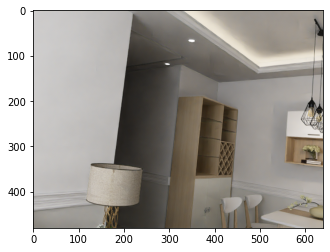

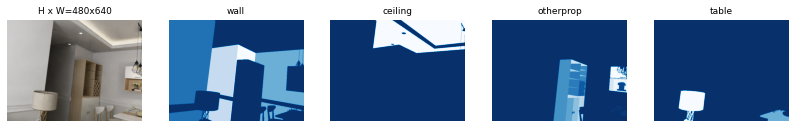

In [6]:
image_id = 4
image = dataset_train.load_image(image_id)
plt.imshow(image)
path = dataset_train.image_info[image_id]['path']
print(path)

mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)


830


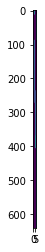

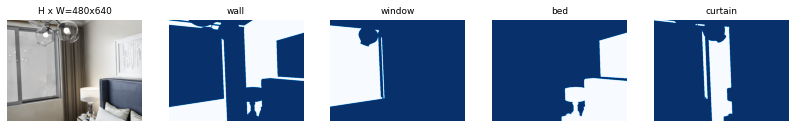

367


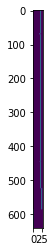

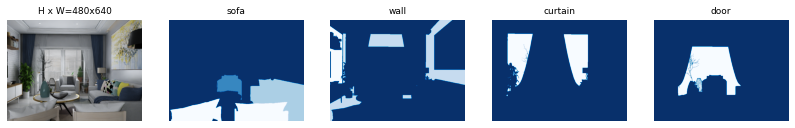

1041


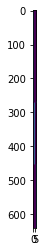

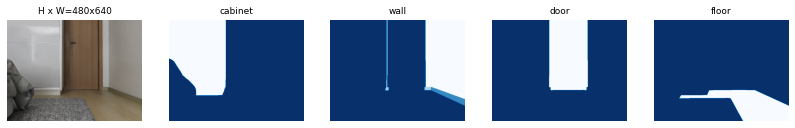

127


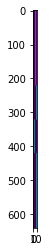

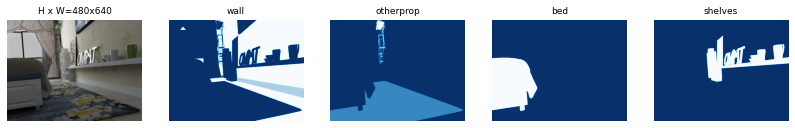

In [7]:
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    print(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [8]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']


In [9]:
categories = [{"id":1,"name":"wall","supercategory":"null"},{"id":2,"name":"floor","supercategory":"null"},{"id":3,"name":"cabinet","supercategory":"null"},{"id":4,"name":"bed","supercategory":"null"},{"id":5,"name":"chair","supercategory":"null"},{"id":6,"name":"sofa","supercategory":"null"},{"id":7,"name":"table","supercategory":"null"},{"id":8,"name":"door","supercategory":"null"},{"id":9,"name":"window","supercategory":"null"},{"id":10,"name":"bookshelf","supercategory":"null"},{"id":11,"name":"picture","supercategory":"null"},{"id":12,"name":"counter","supercategory":"null"},{"id":13,"name":"blinds","supercategory":"null"},{"id":14,"name":"desk","supercategory":"null"},{"id":15,"name":"shelves","supercategory":"null"},{"id":16,"name":"curtain","supercategory":"null"},{"id":17,"name":"dresser","supercategory":"null"},{"id":18,"name":"pillow","supercategory":"null"},{"id":19,"name":"mirror","supercategory":"null"},{"id":20,"name":"floor","supercategory":"null"},{"id":21,"name":"clothes","supercategory":"null"},{"id":22,"name":"ceiling","supercategory":"null"},{"id":23,"name":"books","supercategory":"null"},{"id":24,"name":"refridgerator","supercategory":"null"},{"id":25,"name":"television","supercategory":"null"},{"id":26,"name":"paper","supercategory":"null"},{"id":27,"name":"towel","supercategory":"null"},{"id":28,"name":"shower","supercategory":"null"},{"id":29,"name":"box","supercategory":"null"},{"id":30,"name":"whiteboard","supercategory":"null"},{"id":31,"name":"person","supercategory":"null"},{"id":32,"name":"night","supercategory":"null"},{"id":33,"name":"toilet","supercategory":"null"},{"id":34,"name":"sink","supercategory":"null"},{"id":35,"name":"lamp","supercategory":"null"},{"id":36,"name":"bathtub","supercategory":"null"},{"id":37,"name":"bag","supercategory":"null"},{"id":38,"name":"otherstructure","supercategory":"null"},{"id":39,"name":"otherfurniture","supercategory":"null"}, {"id":40,"name":"otherprop","supercategory":"null"}]
class_names = []
for category in categories:
    class_names.append(category['name'])

class_names = ['BG','wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa',
               'table', 'door', 'window', 'bookshelf', 'picture', 'counter',
               'blinds', 'desk', 'shelves', 'curtain', 'dresser', 'pillow', 
               'mirror', 'floor', 'clothes', 'ceiling', 'books', 'refridgerator',
               'television', 'paper', 'towel', 'shower', 'box', 'whiteboard', 
               'person', 'night', 'toilet', 'sink', 'lamp', 'bathtub', 'bag', 
               'otherstructure', 'otherfurniture', 'otherprop']

print(class_names)
len(class_names)

['BG', 'wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa', 'table', 'door', 'window', 'bookshelf', 'picture', 'counter', 'blinds', 'desk', 'shelves', 'curtain', 'dresser', 'pillow', 'mirror', 'floor', 'clothes', 'ceiling', 'books', 'refridgerator', 'television', 'paper', 'towel', 'shower', 'box', 'whiteboard', 'person', 'night', 'toilet', 'sink', 'lamp', 'bathtub', 'bag', 'otherstructure', 'otherfurniture', 'otherprop']


41

In [10]:
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
'''
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess= tf.Session(config=config):
'''

# Training - Stage 1
print("Training network heads")
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=40,
            layers='heads')



Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: /home/erbachj/MaskRCNN/Mask_RCNN/logs/interiornet20200326T1009/mask_rcnn_interiornet_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_m

/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/keras/engine/training.py:1987: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/40
 99/100 [============================>.] - ETA: 0s - loss: 5.0661 - rpn_class_loss: 0.5788 - rpn_bbox_loss: 1.7271 - mrcnn_class_loss: 1.1224 - mrcnn_bbox_loss: 0.7975 - mrcnn_mask_loss: 0.8404

/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/keras/engine/training.py:2142: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


100/100 [==============================] - 84s - loss: 5.0565 - rpn_class_loss: 0.5750 - rpn_bbox_loss: 1.7339 - mrcnn_class_loss: 1.1145 - mrcnn_bbox_loss: 0.7944 - mrcnn_mask_loss: 0.8387 - val_loss: 3.4581 - val_rpn_class_loss: 0.2519 - val_rpn_bbox_loss: 1.3363 - val_mrcnn_class_loss: 0.5826 - val_mrcnn_bbox_loss: 0.5980 - val_mrcnn_mask_loss: 0.6892
Epoch 2/40
100/100 [==============================] - 44s - loss: 4.0525 - rpn_class_loss: 0.2986 - rpn_bbox_loss: 1.7165 - mrcnn_class_loss: 0.7554 - mrcnn_bbox_loss: 0.5947 - mrcnn_mask_loss: 0.6874 - val_loss: 4.2272 - val_rpn_class_loss: 0.3009 - val_rpn_bbox_loss: 1.8515 - val_mrcnn_class_loss: 0.8185 - val_mrcnn_bbox_loss: 0.5780 - val_mrcnn_mask_loss: 0.6782
Epoch 3/40
100/100 [==============================] - 44s - loss: 4.3938 - rpn_class_loss: 0.2657 - rpn_bbox_loss: 2.1330 - mrcnn_class_loss: 0.7616 - mrcnn_bbox_loss: 0.5553 - mrcnn_mask_loss: 0.6783 - val_loss: 3.4181 - val_rpn_class_loss: 0.2061 - val_rpn_bbox_loss: 1.291

100/100 [==============================] - 45s - loss: 2.7847 - rpn_class_loss: 0.1947 - rpn_bbox_loss: 1.2548 - mrcnn_class_loss: 0.5862 - mrcnn_bbox_loss: 0.3561 - mrcnn_mask_loss: 0.3930 - val_loss: 3.1533 - val_rpn_class_loss: 0.1793 - val_rpn_bbox_loss: 1.6364 - val_mrcnn_class_loss: 0.5748 - val_mrcnn_bbox_loss: 0.3451 - val_mrcnn_mask_loss: 0.4177
Epoch 24/40
100/100 [==============================] - 45s - loss: 3.3050 - rpn_class_loss: 0.2341 - rpn_bbox_loss: 1.6214 - mrcnn_class_loss: 0.6435 - mrcnn_bbox_loss: 0.3868 - mrcnn_mask_loss: 0.4192 - val_loss: 2.6823 - val_rpn_class_loss: 0.1696 - val_rpn_bbox_loss: 1.0967 - val_mrcnn_class_loss: 0.5807 - val_mrcnn_bbox_loss: 0.3532 - val_mrcnn_mask_loss: 0.4820
Epoch 25/40
100/100 [==============================] - 44s - loss: 3.5084 - rpn_class_loss: 0.2314 - rpn_bbox_loss: 1.9266 - mrcnn_class_loss: 0.5840 - mrcnn_bbox_loss: 0.3565 - mrcnn_mask_loss: 0.4098 - val_loss: 3.3517 - val_rpn_class_loss: 0.1928 - val_rpn_bbox_loss: 1.7

In [11]:
# Training - Stage 2
# Finetune layers from ResNet stage 4 and up
print("Fine tune Resnet stage 4 and up")
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=120,
            layers='4+')



Fine tune Resnet stage 4 and up

Starting at epoch 40. LR=0.001

Checkpoint Path: /home/erbachj/MaskRCNN/Mask_RCNN/logs/interiornet20200326T1009/mask_rcnn_interiornet_{epoch:04d}.h5
Selecting layers to train
res4a_branch2a         (Conv2D)
bn4a_branch2a          (BatchNorm)
res4a_branch2b         (Conv2D)
bn4a_branch2b          (BatchNorm)
res4a_branch2c         (Conv2D)
res4a_branch1          (Conv2D)
bn4a_branch2c          (BatchNorm)
bn4a_branch1           (BatchNorm)
res4b_branch2a         (Conv2D)
bn4b_branch2a          (BatchNorm)
res4b_branch2b         (Conv2D)
bn4b_branch2b          (BatchNorm)
res4b_branch2c         (Conv2D)
bn4b_branch2c          (BatchNorm)
res4c_branch2a         (Conv2D)
bn4c_branch2a          (BatchNorm)
res4c_branch2b         (Conv2D)
bn4c_branch2b          (BatchNorm)
res4c_branch2c         (Conv2D)
bn4c_branch2c          (BatchNorm)
res4d_branch2a         (Conv2D)
bn4d_branch2a          (BatchNorm)
res4d_branch2b         (Conv2D)
bn4d_branch2b          

/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/keras/engine/training.py:1987: UserWarning: Using

Epoch 41/120
 99/100 [============================>.] - ETA: 0s - loss: 2.7164 - rpn_class_loss: 0.1758 - rpn_bbox_loss: 1.3036 - mrcnn_class_loss: 0.5672 - mrcnn_bbox_loss: 0.3191 - mrcnn_mask_loss: 0.3506

/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/keras/engine/training.py:2142: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


100/100 [==============================] - 75s - loss: 2.7126 - rpn_class_loss: 0.1757 - rpn_bbox_loss: 1.2985 - mrcnn_class_loss: 0.5668 - mrcnn_bbox_loss: 0.3207 - mrcnn_mask_loss: 0.3508 - val_loss: 3.1559 - val_rpn_class_loss: 0.2068 - val_rpn_bbox_loss: 1.5993 - val_mrcnn_class_loss: 0.5558 - val_mrcnn_bbox_loss: 0.3120 - val_mrcnn_mask_loss: 0.4820
Epoch 42/120
100/100 [==============================] - 53s - loss: 2.8134 - rpn_class_loss: 0.1934 - rpn_bbox_loss: 1.4287 - mrcnn_class_loss: 0.5398 - mrcnn_bbox_loss: 0.3064 - mrcnn_mask_loss: 0.3451 - val_loss: 3.4075 - val_rpn_class_loss: 0.1779 - val_rpn_bbox_loss: 1.9349 - val_mrcnn_class_loss: 0.6041 - val_mrcnn_bbox_loss: 0.3263 - val_mrcnn_mask_loss: 0.3644
Epoch 43/120
100/100 [==============================] - 53s - loss: 3.0075 - rpn_class_loss: 0.2140 - rpn_bbox_loss: 1.5404 - mrcnn_class_loss: 0.5699 - mrcnn_bbox_loss: 0.3251 - mrcnn_mask_loss: 0.3582 - val_loss: 3.1005 - val_rpn_class_loss: 0.2290 - val_rpn_bbox_loss: 1

100/100 [==============================] - 53s - loss: 2.4557 - rpn_class_loss: 0.1485 - rpn_bbox_loss: 1.2335 - mrcnn_class_loss: 0.4728 - mrcnn_bbox_loss: 0.2690 - mrcnn_mask_loss: 0.3318 - val_loss: 2.5492 - val_rpn_class_loss: 0.2049 - val_rpn_bbox_loss: 1.0892 - val_mrcnn_class_loss: 0.5650 - val_mrcnn_bbox_loss: 0.3198 - val_mrcnn_mask_loss: 0.3704
Epoch 64/120
100/100 [==============================] - 53s - loss: 2.8398 - rpn_class_loss: 0.1711 - rpn_bbox_loss: 1.5607 - mrcnn_class_loss: 0.4864 - mrcnn_bbox_loss: 0.2703 - mrcnn_mask_loss: 0.3513 - val_loss: 2.4106 - val_rpn_class_loss: 0.1579 - val_rpn_bbox_loss: 1.0623 - val_mrcnn_class_loss: 0.5051 - val_mrcnn_bbox_loss: 0.2911 - val_mrcnn_mask_loss: 0.3941
Epoch 65/120
100/100 [==============================] - 53s - loss: 2.4168 - rpn_class_loss: 0.1452 - rpn_bbox_loss: 1.1858 - mrcnn_class_loss: 0.5012 - mrcnn_bbox_loss: 0.2663 - mrcnn_mask_loss: 0.3183 - val_loss: 2.7504 - val_rpn_class_loss: 0.1744 - val_rpn_bbox_loss: 1

100/100 [==============================] - 53s - loss: 2.3004 - rpn_class_loss: 0.1210 - rpn_bbox_loss: 1.1632 - mrcnn_class_loss: 0.4543 - mrcnn_bbox_loss: 0.2574 - mrcnn_mask_loss: 0.3045 - val_loss: 2.1757 - val_rpn_class_loss: 0.1631 - val_rpn_bbox_loss: 1.0659 - val_mrcnn_class_loss: 0.4378 - val_mrcnn_bbox_loss: 0.2383 - val_mrcnn_mask_loss: 0.2705
Epoch 86/120
100/100 [==============================] - 53s - loss: 2.2833 - rpn_class_loss: 0.1322 - rpn_bbox_loss: 1.1788 - mrcnn_class_loss: 0.4237 - mrcnn_bbox_loss: 0.2389 - mrcnn_mask_loss: 0.3096 - val_loss: 1.9516 - val_rpn_class_loss: 0.1988 - val_rpn_bbox_loss: 0.6875 - val_mrcnn_class_loss: 0.4732 - val_mrcnn_bbox_loss: 0.2478 - val_mrcnn_mask_loss: 0.3442
Epoch 87/120
100/100 [==============================] - 53s - loss: 2.2977 - rpn_class_loss: 0.1203 - rpn_bbox_loss: 1.2610 - mrcnn_class_loss: 0.3997 - mrcnn_bbox_loss: 0.2301 - mrcnn_mask_loss: 0.2866 - val_loss: 2.6541 - val_rpn_class_loss: 0.2489 - val_rpn_bbox_loss: 1

100/100 [==============================] - 53s - loss: 2.4487 - rpn_class_loss: 0.1365 - rpn_bbox_loss: 1.3323 - mrcnn_class_loss: 0.4384 - mrcnn_bbox_loss: 0.2388 - mrcnn_mask_loss: 0.3027 - val_loss: 1.9786 - val_rpn_class_loss: 0.1209 - val_rpn_bbox_loss: 0.8723 - val_mrcnn_class_loss: 0.4765 - val_mrcnn_bbox_loss: 0.2372 - val_mrcnn_mask_loss: 0.2717
Epoch 108/120
100/100 [==============================] - 52s - loss: 2.0359 - rpn_class_loss: 0.1065 - rpn_bbox_loss: 1.0174 - mrcnn_class_loss: 0.4078 - mrcnn_bbox_loss: 0.2212 - mrcnn_mask_loss: 0.2831 - val_loss: 2.2997 - val_rpn_class_loss: 0.1256 - val_rpn_bbox_loss: 1.1745 - val_mrcnn_class_loss: 0.4733 - val_mrcnn_bbox_loss: 0.2258 - val_mrcnn_mask_loss: 0.3005
Epoch 109/120
100/100 [==============================] - 52s - loss: 2.1815 - rpn_class_loss: 0.1185 - rpn_bbox_loss: 1.1659 - mrcnn_class_loss: 0.3878 - mrcnn_bbox_loss: 0.2231 - mrcnn_mask_loss: 0.2861 - val_loss: 2.2184 - val_rpn_class_loss: 0.1442 - val_rpn_bbox_loss:

In [12]:
# Training - Stage 3
# Fine tune all layers
print("Fine tune all layers")
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE / 10,
            epochs=160,
            layers='all')

Fine tune all layers

Starting at epoch 120. LR=0.0001

Checkpoint Path: /home/erbachj/MaskRCNN/Mask_RCNN/logs/interiornet20200326T1009/mask_rcnn_interiornet_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNor

/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/keras/engine/training.py:1987: UserWarning: Using

Epoch 121/160
 99/100 [============================>.] - ETA: 0s - loss: 1.8728 - rpn_class_loss: 0.0931 - rpn_bbox_loss: 0.9578 - mrcnn_class_loss: 0.3458 - mrcnn_bbox_loss: 0.2011 - mrcnn_mask_loss: 0.2751

/home/erbachj/MaskRCNN/local/lib/python3.6/site-packages/keras/engine/training.py:2142: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


100/100 [==============================] - 83s - loss: 1.8634 - rpn_class_loss: 0.0930 - rpn_bbox_loss: 0.9503 - mrcnn_class_loss: 0.3448 - mrcnn_bbox_loss: 0.2003 - mrcnn_mask_loss: 0.2750 - val_loss: 2.0113 - val_rpn_class_loss: 0.1332 - val_rpn_bbox_loss: 0.8183 - val_mrcnn_class_loss: 0.5100 - val_mrcnn_bbox_loss: 0.2726 - val_mrcnn_mask_loss: 0.2772
Epoch 122/160
100/100 [==============================] - 58s - loss: 1.7117 - rpn_class_loss: 0.0869 - rpn_bbox_loss: 0.8284 - mrcnn_class_loss: 0.3368 - mrcnn_bbox_loss: 0.1961 - mrcnn_mask_loss: 0.2636 - val_loss: 2.8464 - val_rpn_class_loss: 0.2627 - val_rpn_bbox_loss: 1.4843 - val_mrcnn_class_loss: 0.4900 - val_mrcnn_bbox_loss: 0.2740 - val_mrcnn_mask_loss: 0.3354
Epoch 123/160
100/100 [==============================] - 58s - loss: 1.7397 - rpn_class_loss: 0.1012 - rpn_bbox_loss: 0.8214 - mrcnn_class_loss: 0.3538 - mrcnn_bbox_loss: 0.1988 - mrcnn_mask_loss: 0.2644 - val_loss: 2.3214 - val_rpn_class_loss: 0.0936 - val_rpn_bbox_loss:

100/100 [==============================] - 57s - loss: 1.9962 - rpn_class_loss: 0.0996 - rpn_bbox_loss: 1.0817 - mrcnn_class_loss: 0.3455 - mrcnn_bbox_loss: 0.1951 - mrcnn_mask_loss: 0.2744 - val_loss: 3.0697 - val_rpn_class_loss: 0.2729 - val_rpn_bbox_loss: 1.7213 - val_mrcnn_class_loss: 0.4827 - val_mrcnn_bbox_loss: 0.2371 - val_mrcnn_mask_loss: 0.3557
Epoch 144/160
100/100 [==============================] - 57s - loss: 1.8585 - rpn_class_loss: 0.0977 - rpn_bbox_loss: 0.9974 - mrcnn_class_loss: 0.3171 - mrcnn_bbox_loss: 0.1815 - mrcnn_mask_loss: 0.2648 - val_loss: 2.2602 - val_rpn_class_loss: 0.1539 - val_rpn_bbox_loss: 1.0246 - val_mrcnn_class_loss: 0.5035 - val_mrcnn_bbox_loss: 0.2755 - val_mrcnn_mask_loss: 0.3027
Epoch 145/160
100/100 [==============================] - 58s - loss: 1.8092 - rpn_class_loss: 0.0815 - rpn_bbox_loss: 0.8974 - mrcnn_class_loss: 0.3529 - mrcnn_bbox_loss: 0.1947 - mrcnn_mask_loss: 0.2827 - val_loss: 2.6331 - val_rpn_class_loss: 0.1675 - val_rpn_bbox_loss:

In [13]:
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_interior.h5")
model.keras_model.save_weights(model_path)

In [14]:
class InferenceConfig(interior.InteriorNetConfig):
            # Set batch size to 1 since we'll be running inference on
            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
            GPU_COUNT = 1
            IMAGES_PER_GPU = 1
            DETECTION_MIN_CONFIDENCE = 0
config = InferenceConfig()
config.display()

with tf.device("/gpu:0"):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,config=config)

model_path = model.find_last()
print(model_path)
# Load weights trained on MS-COCO
model.load_weights(model_path, by_name=True)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                53
IMAGE_MIN_DIM                  640
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7/test/3FO4MLNLVIOK_Bedroom/cam0/data/14.png
new function


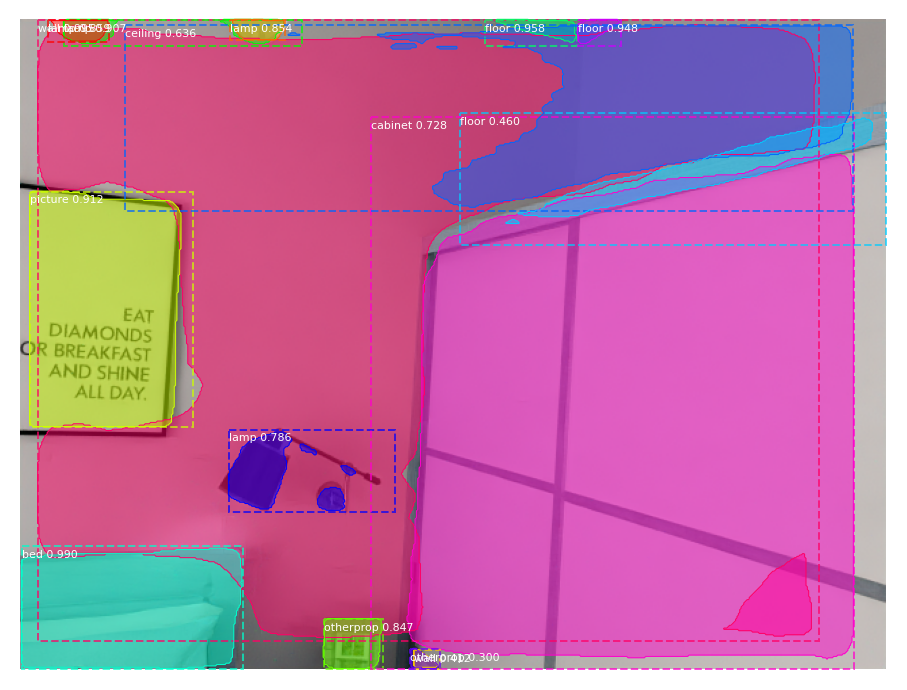

In [27]:
path = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/data/HD7/test/3FO4MLNLVIOK_Bedroom/cam0/data/14.png'
SAVE_DIR = '/home/erbachj/MaskRCNN/Mask_RCNN/data/InteriorNet/Results/'
name = '0'
print(path)
im = cv2.imread(path)
results = model.detect([im])
# Visualize results
r = results[0]
visualize.display_instances(im, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
visualize.save_image(image_name = name, image = im, boxes = r['rois'], masks = r['masks'], class_ids = r['class_ids'], class_names = class_names, scores = r['scores'], save_dir = SAVE_DIR)
